### rdd_simulate1

Exemplo prático do livro "Causal Inference: The Mixtape" referente ao capítulo tratando sobre Regressão Descontínua (*RDD - Regression Discontinuity Design*).

In [15]:
# Importando os pacotes necessários
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import ssl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Criando uma função de importação/leitura dos dados
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

In [21]:
# Criando uma base aleatória com distribuição normal para realizar a simulação
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)}) # Gerando base de 1000 observações, com média de 50 e variância de 25
dat

,x
0,52.514328
1,67.791554
2,68.237198
3,86.173921
4,6.713541
...,...
995,57.107238
996,-7.484789
997,62.357818
998,49.373397


In [22]:
## Tratando a base
# Restringindo nossa base ao intervalo de 0 a 100
dat.loc[dat.x<0, 'x'] = 0 
dat = dat[dat.x<100]
# Criando nossa variável dummy de status do "tratamento"
dat['D'] = 0
dat.loc[dat.x>50, 'D'] = 1 # Definindo nosso 'cutoff' no valor de 50
# Criando nossas variáveis de resultados potências
dat['y1'] = 25 + 0*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0]) # Para o caso em que o tratamento não ocorre
dat['y2'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0]) # Para o caso em que o tratamento ocorre
dat

,x,D,y1,y2
0,52.514328,1,91.154049,127.185248
1,67.791554,1,149.101394,101.703026
2,68.237198,1,97.427546,150.682187
3,86.173921,1,166.459920,191.743768
4,6.713541,0,59.254382,36.564758
...,...,...,...,...
995,57.107238,1,99.546131,151.802659
996,0.000000,0,13.475173,50.863323
997,62.357818,1,112.971549,200.850448
998,49.373397,0,77.372934,111.133870


"Resultados Potencias Contrafactuais


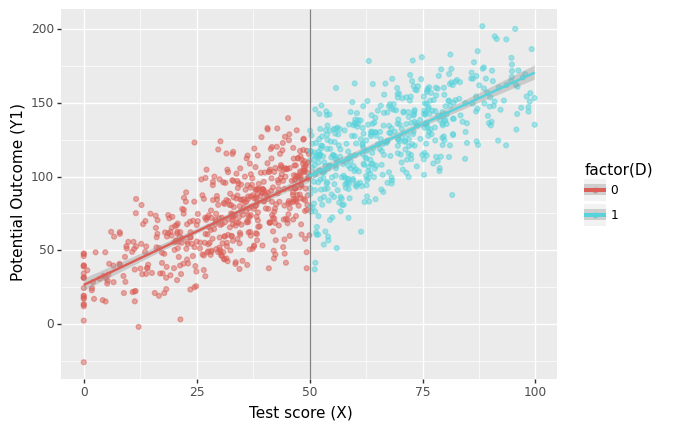

<ggplot: (147088618828)>

In [23]:
# Plotando nossa simulação para o caso hipotético de ausência do tratamento
print('"Resultados Potencias Contrafactuais')
p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +    p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y1)")

Como podemos ver acima, dado que a continuidade se mantém no *cutoff*, o pressuposto chave de continuidade para o RDD é válido.

### rdd_simulate2

Vamos simular agora o caso mais real onde o tratamento de fato ocorreu.

Resultados Potenciais Contrafactuais após o Tratamento


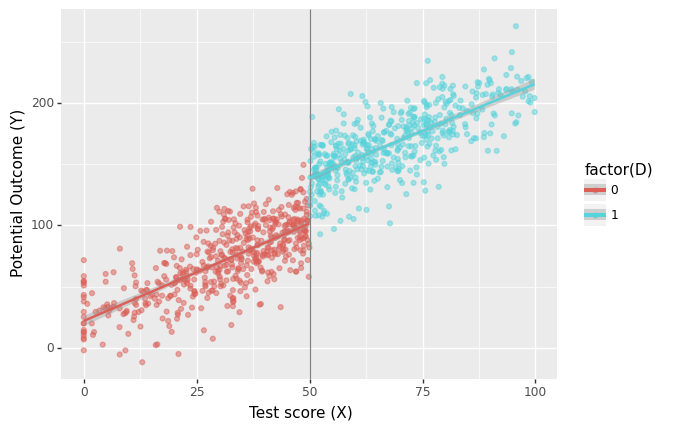

<ggplot: (147088266674)>

In [24]:
# Plotando nossa simulação para o caso em que o tratamento ocorreu
print('Resultados Potenciais Contrafactuais após o Tratamento')
p.ggplot(dat, p.aes(x='x', y='y2', color = 'factor(D)')) +    p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

É fácil visualizar o salto descontínuo em nossa variável de interesse pelo gráfico. É neste salto que está contido o tão almejado *LATE (Local Average Treatment Effect)* que buscamos.

### rdd_simulate3

Simulando o caso em que o processo de geração dos dados é não-linear.

In [30]:
## Criando uma nova base aleatória com distribuição normal
# Note que esta nova base é menor e mais dispersa, mas com a mesma média
dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
# Restringindo nossa base ao intervalo de 0 a 100
dat.loc[dat.x<0, 'x'] = 0 
# Criando nossa variável dummy de status do "tratamento"
dat['D'] = 0
dat.loc[dat.x>140, 'D'] = 1 # Definindo nosso 'cutoff' no valor de 50
# Gerando variáveis não-lineares
dat['x2'] = dat['x']**2 # Criando uma coluna com a 'running variable' ao quadrado
dat['x3'] = dat['x']**3 # Criando uma coluna com a 'running variable' ao cubo
# Criando uma coluna com nossa variável de interesse trasformada por processo não-linear
dat['y3'] = 10000 + 0*dat.D - 100 * dat.x + dat.x2 + np.random.normal(0, 1000, 1000)
dat = dat[dat.x < 280] # Limitando nossa 'running variable' ao valor máximo de 279
dat

,x,D,x2,x3,y3
0,4.690445,0,22.000276,1.031911e+02,9327.330862
1,114.850354,0,13190.603700,1.514945e+06,10308.083129
2,200.370808,1,40148.460587,8.044579e+06,30293.225148
3,49.432294,0,2443.551703,1.207904e+05,7388.024397
4,84.692066,0,7172.745978,6.074747e+05,8643.162793
...,...,...,...,...,...
995,9.591052,0,91.988270,8.822642e+02,8612.542409
996,116.914019,0,13668.887851,1.598085e+06,11315.679771
997,58.768363,0,3453.720490,2.029695e+05,6805.793804
998,99.988938,0,9997.787658,9.996682e+05,9877.511073


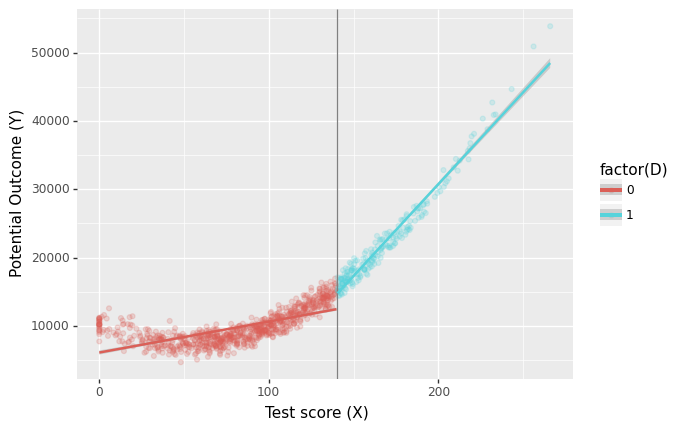

<ggplot: (147088802136)>

In [31]:
# Plotando a simulação com modelo linear para esperança condicional usando 'y3' como variável dependente 
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +    p.geom_point(alpha = 0.2) +    p.geom_vline(xintercept = 140, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

### rdd_simulate4

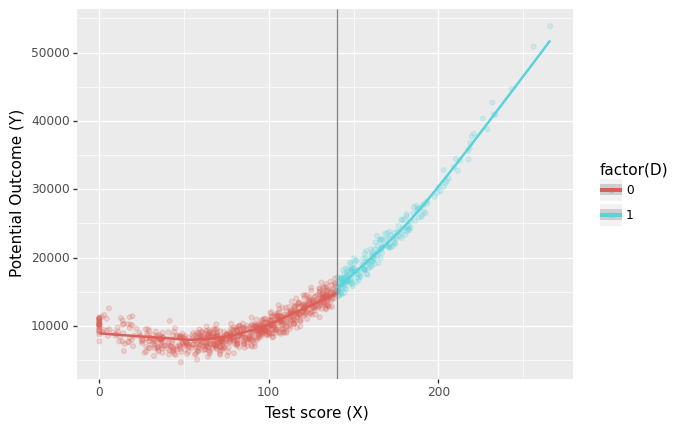

<ggplot: (147088724667)>

In [32]:
# Plotando a simulação ajustando para polinomios de ordem maior
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +    p.geom_point(alpha = 0.2) +    p.geom_vline(xintercept = 140, colour = "grey") +    p.stat_smooth(method = "lowess", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

Comparando os dois últimos gráficos acima podemos ver que um simples ajuste utilizando polinômio de 2ª ordem já elimina o salto espúrio que nosso modelo apresentava (devido ao processo não-linear de geração dos dados). Note que fazemos isso apenas trocando o valor do parâmetro `stat_smooth` de *lm* para *lowess*.

In [43]:
# Estimando a regressão totalmente interativa
all_columns = "+".join(dat.columns.difference(["D", 'y3']))
formula = 'y3 ~ D * ({})'.format(all_columns)
regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     5560.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:05:09   Log-Likelihood:                -8323.6
No. Observations:                1000   AIC:                         1.666e+04
Df Residuals:                     992   BIC:                         1.670e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.027e+04    159.845     64.280      0.000    9961.133    1.06e+04
D          -7528.2302    1.6e+04     -0.472      0.637   -3.89e+04    2.38e+04
x           -110.1333      8.911    -12.359      0.000    -127.620     -92.646
x2             1.1186      0.145      7.731      0.000       0.835       1.402
x3            -0.0005      0.001     -0.768      0.443      -0.002       0.001
D:x          129.5575    257.466      0.503      0.615    -375.682     634.797
D:x2          -0.7571      1.368     -0.553      0.580      -3.441       1.927
D:x3           0.0016      0.002      0.670      0.503      -0.003       0.006
==============================================================================
Omnibus:                        6.116   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.986
Skew:                           0.081   Prob(JB):                       0.0827
Kurtosis:                       2.695   Cond. No.                     1.92e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""